<h4><b>Data Science & Business Analytics Internship at The Sparks Foundation</b></h4>
<h4><b>Name - Aditya Dixit</b></h4>
<hr>
<h2>Task 3: Exploratory Data Analysis - Retail<h2>
<hr>

<h4><b>Problem statement:</b> Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?<h4>

Dataset Link - https://bit.ly/3i4rbWl

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#checking for any missing or null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#checking for any duplicate values
df.duplicated().sum()

17

In [ ]:
#dropping any duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(9977, 13)

In [ ]:
#checking the countrie present in the dataset
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
#checking the columns present in the dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<h3>Now Analysing the dataset

In [ ]:
#Now firstly checking profits earned in each state
state_profit_df = df.groupby('State')['Profit'].sum().reset_index()
state_profit_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


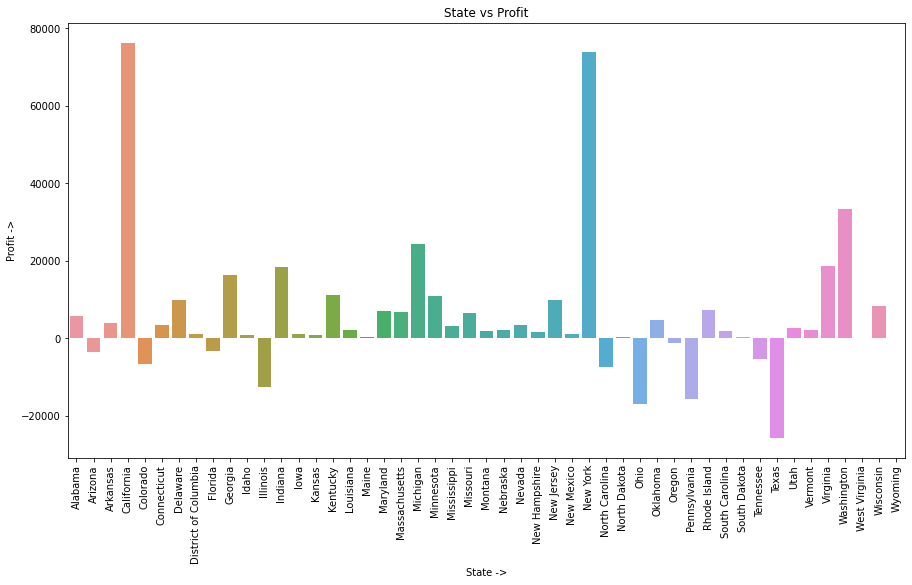

In [ ]:
#plotting graph of State vs Profit
plt.figure(figsize=(15,8))
sns.barplot(state_profit_df['State'],state_profit_df['Profit'])
plt.title('State vs Profit')
plt.xlabel('State ->')
plt.ylabel('Profit ->')
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


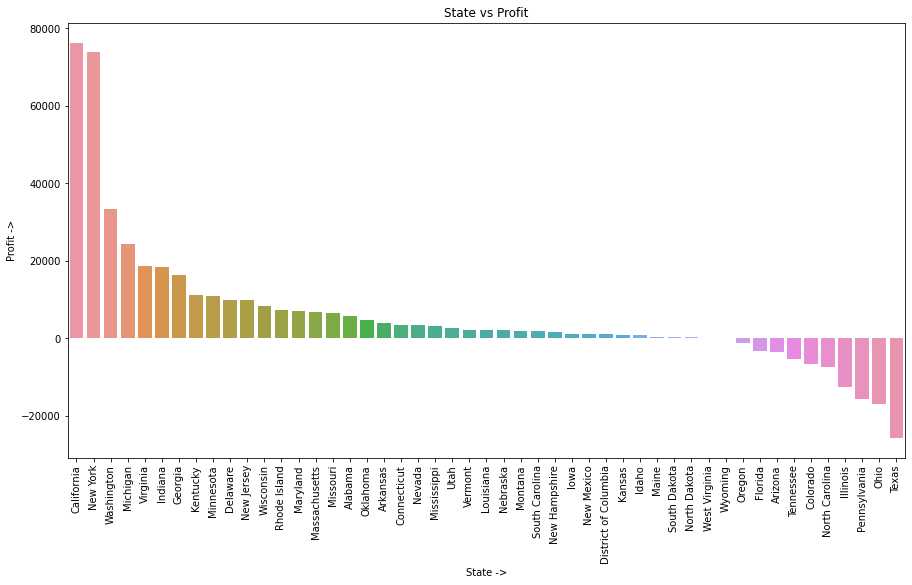

In [ ]:
#plotting the graph in descending order of profit
state_profit_df.sort_values(by=['Profit'],ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(state_profit_df['State'],state_profit_df['Profit'])
plt.title('State vs Profit')
plt.xlabel('State ->')
plt.ylabel('Profit ->')
plt.xticks(rotation='vertical')
plt.show()

From what we can see is that selling in states Texas, Ohio, Pennsylvania, Illinois and North Carolina is causing most losses.

The states California, New York, Washington, Michigan and Virgina help in securing the most profit in sales.

In [ ]:
#looking at the profit of state Wyoming
df[df['State']=='Wyoming']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
5869,Standard Class,Home Office,United States,Cheyenne,Wyoming,82001,West,Furniture,Chairs,1603.136,4,0.2,100.196


In [ ]:
#looking at the profit of state West Virginia
df[df['State']=='West Virginia']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7894,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Binders,82.400,5,0.0,40.3760
7895,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Binders,6.240,2,0.0,3.0576
7896,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Paper,447.840,8,0.0,219.4416
9486,Same Day,Consumer,United States,Wheeling,West Virginia,26003,East,Furniture,Tables,673.344,3,0.3,-76.9536


Now, Counting orders from each state

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


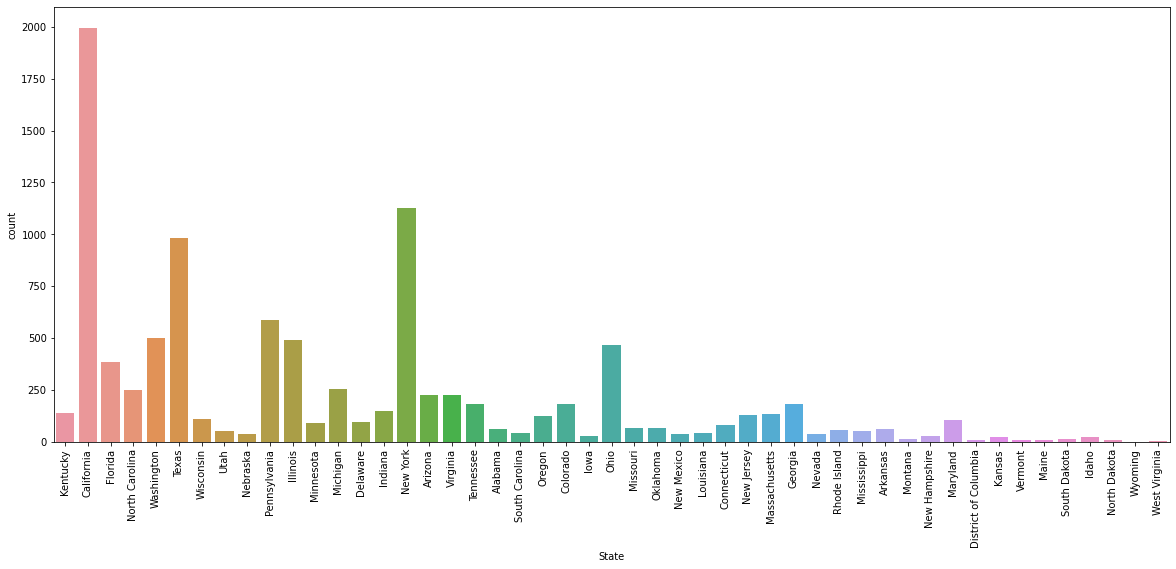

In [ ]:
#State vs Count
plt.figure(figsize=(20,8))
sns.countplot('State',data=df)
plt.xticks(rotation='vertical')
plt.show()

The states which order the most are California, New York, Texas and Pennsylvania.

Now checking which Region in the US generates the most Profit

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


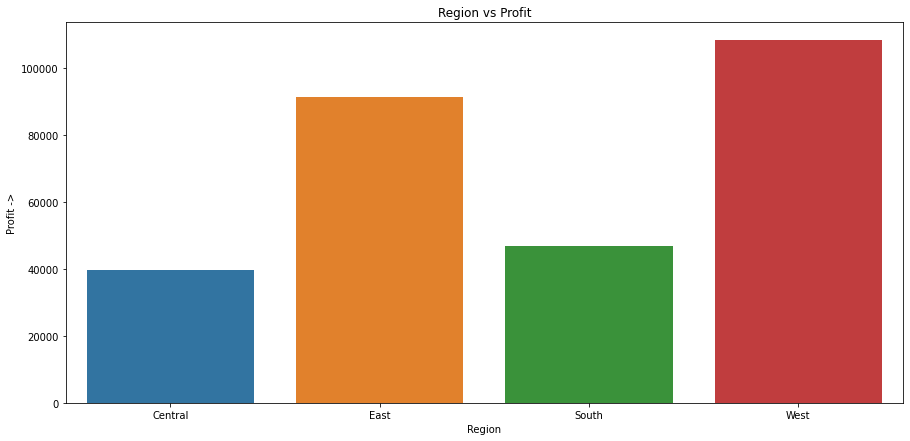

In [ ]:
region_profit_df = df.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(region_profit_df['Region'],region_profit_df['Profit'])
plt.title('Region vs Profit')
plt.xlabel('Region')
plt.ylabel('Profit ->')
plt.show()

In [ ]:
region_profit_df.head()

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


As we can see from the above task, The West Region followed by East, South and Central region generates the maximum profits respectively

Now, lets look at which products generates the maximum profits and loss

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


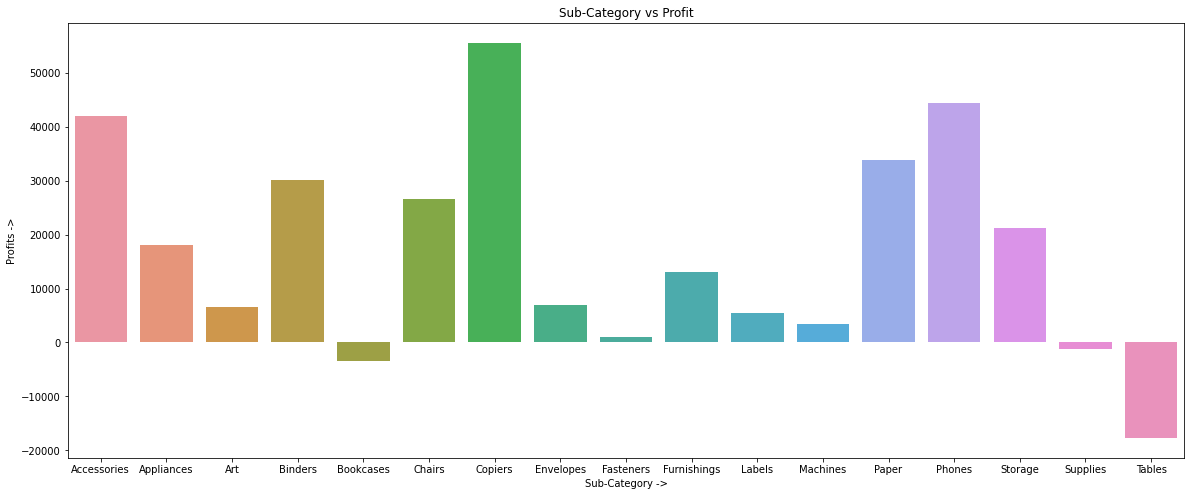

In [ ]:
#Lets look at the sub-category of products producing the maximum profit
sub_category_profit_df = df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(sub_category_profit_df['Sub-Category'],sub_category_profit_df['Profit'])
plt.title('Sub-Category vs Profit')
plt.xlabel('Sub-Category ->')
plt.ylabel('Profits ->')
plt.show()

In [ ]:
#The top 5 sub-categories making the most profit -
print('The Top 5 Sub-Category making the most profit are - ')
sub_category_profit_df.sort_values(by=['Profit'],ascending=False,inplace=True)
sub_category_profit_df.head()

The Top 5 Sub-Category making the most profit are - 


,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003


As we can see above, Copiers, Phones, Accessories, Paper and Binders generate the maximum profit

In [ ]:
#The least 5 sub-categories - 
sub_category_profit_df.sort_values(by=['Profit'],ascending=True,inplace=True)
sub_category_profit_df.head()

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569


The least profit making sub-categories are Tables, Bookcases, Supplies, Fasteners and Machines

<h3> Now finding the profit/sub-category</h3>

In [ ]:
#creating a new data frame
profit_sub_category = df[['Sub-Category','Quantity','Profit']].copy()
profit_sub_category.head()

,Sub-Category,Quantity,Profit
0,Bookcases,2,41.9136
1,Chairs,3,219.5820
2,Labels,2,6.8714
3,Tables,5,-383.0310
4,Storage,2,2.5164


In [ ]:
profit_per_sub_category = profit_sub_category.groupby('Sub-Category')['Quantity','Profit'].sum().reset_index()
profit_per_sub_category.head(100)

<ipython-input-75-32000dbd9dc6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profit_per_sub_category = profit_sub_category.groupby('Sub-Category')['Quantity','Profit'].sum().reset_index()


,Sub-Category,Quantity,Profit
0,Accessories,2976,41936.6357
1,Appliances,1729,18138.0054
2,Art,2996,6524.6118
3,Binders,5971,30228.0003
4,Bookcases,868,-3472.5560
5,Chairs,2351,26567.1278
6,Copiers,234,55617.8249
7,Envelopes,906,6964.1767
8,Fasteners,914,949.5182
9,Furnishings,3560,13052.7230


In [ ]:
profit_per_sub_category['Profit/Sub-Category'] = profit_per_sub_category['Profit'] / profit_per_sub_category['Quantity']

In [ ]:
profit_per_sub_category.head(20)

,Sub-Category,Quantity,Profit,Profit/Sub-Category
0,Accessories,2976,41936.6357,14.091611
1,Appliances,1729,18138.0054,10.490460
2,Art,2996,6524.6118,2.177774
3,Binders,5971,30228.0003,5.062469
4,Bookcases,868,-3472.5560,-4.000641
5,Chairs,2351,26567.1278,11.300352
6,Copiers,234,55617.8249,237.683012
7,Envelopes,906,6964.1767,7.686729
8,Fasteners,914,949.5182,1.038860
9,Furnishings,3560,13052.7230,3.666495


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


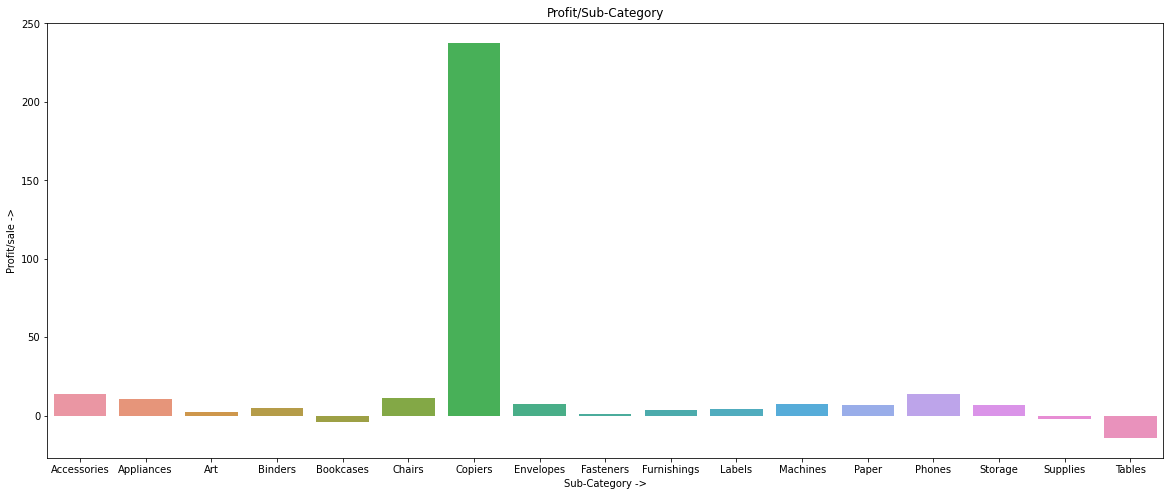

In [ ]:
#Lets look at the sub-category of products producing the maximum profit
plt.figure(figsize=(20,8))
sns.barplot(profit_per_sub_category['Sub-Category'],profit_per_sub_category['Profit/Sub-Category'])
plt.title('Profit/Sub-Category')
plt.xlabel('Sub-Category ->')
plt.ylabel('Profit/sale ->')
plt.show()

One Important information which we get from this barplot is that in the sale of Bookcases, Supplies and Tables, we make loses.

On the other hand, we make maximum profit per sale by selling Copiers.

Now lets look at a final plot by plotting Quantity sold and profit generated from it.

<ipython-input-91-806c3a351d1a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df = new_df.groupby('Sub-Category')['Quantity','Profit'].sum()


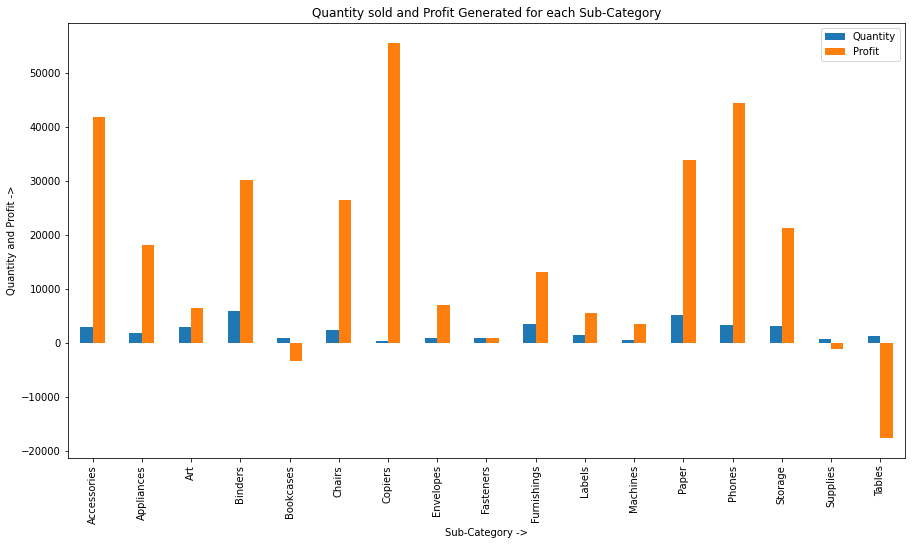

In [ ]:
new_df = df[['Sub-Category','Quantity','Profit']].copy()
new_df = new_df.groupby('Sub-Category')['Quantity','Profit'].sum()

new_df.plot(kind='bar',figsize=(15,8))
plt.title('Quantity sold and Profit Generated for each Sub-Category')
plt.xlabel('Sub-Category ->')
plt.ylabel('Quantity and Profit ->')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
new_df_2=df[['State','Quantity']].copy()

new_df_2 = new_df_2.groupby('State')['Quantity'].sum().reset_index()
new_df_2.sort_values(by=['Quantity'],ascending='False',inplace=True)
new_df_2.head(100)

,State,Quantity
48,Wyoming,4
46,West Virginia,18
32,North Dakota,30
17,Maine,35
7,District of Columbia,40
39,South Dakota,42
43,Vermont,50
24,Montana,56
10,Idaho,64
14,Kansas,74


<h3>Conclusion</h3>

<h4>
Some Positives in the bussiness - 
<ul>
<li>The best selling product which produces the maximum profit is - 
Copiers. Copiers is one of the best selling products as the bussiness generates approx 237$/Copier. Even though Copiers was one of the least selling product among all, it also gave us the most profit per sale.
<li>The top 3 profit making products are - Copiers, Accessories and Phones.
<li>The top 3 selling products are - Binders, Papers and Furnishings.
<li>The West Region followed by East, South and Central region generates the maximum profits respectively.
<li>The states California, New York, Washington, Michigan and Virgina help in securing the most profit in sales.
</ul>
</h4>
<h4>
Now, let's look at some weak areas in the bussiness - 
<ul>
<li>From what we can see is that selling in states Texas, Ohio, Pennsylvania, Illinois and North Carolina is causing most losses.
<li>Tables followed by Bookcases and Supplies are loss making products, so it should be considered to stop selling these items or find a way to make these products profitable per sale.
<li>Tables especially makes the most losses, so it sales should be stopped initially until a new table design or strategy which makes the sale of tables profitable .
<li>A proper strategy should be implemented in order to reduce the losses and make a profit in the states of Texas, Ohio, Pennsylvania, North Carolina, Illinois, Colorado, Tennessee, Arizon and Florida. Need to create a new strategy to reduce losses.
<li>More marketing or a change of marketing strategy or more advertising should be done in the states of Wyoming, West Virginia, North & South Dakota, Maine, District of Columbia, Vermont, Montana, Idaho and kansas	as the sales are least from these States.
<li>Overall, we need to look into reducing our losses as much as possible, and try to prioritize tasks pertaining to the weak areas.
</ul>
</h4>


